In [66]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from skimage.transform import resize
from tqdm import tqdm
from skimage.io import imread
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [71]:
train=pd.read_csv('C:/Projects/Digit-recognization/train/train.csv')
train_path="C:/Projects/Digit-recognization/train/Images/train/"
test_path="C:/Projects/Digit-recognization/train/Images/test/"
test = pd.read_csv('C:/Projects/Digit-recognization/test.csv')

In [36]:
# loading training images
train_img = []
for img_name in tqdm(train['filename']):
    # defining the image path
    image_path = train_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [05:41<00:00, 143.35it/s]


In [72]:
# loading test images
test_img = []
for img_name in tqdm(test['filename']):
    # defining the image path
    image_path = test_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [03:15<00:00, 107.35it/s]


In [73]:
X = np.array(train_img)
X_test_data = np.array(test_img)

In [49]:
y_data = pd.read_csv('C:/Projects/Digit-recognization/train/train.csv')
y_data = y_data.drop(['filename'],axis=1)
y = y_data.to_numpy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size =.33)

In [51]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (26264, 1)
Shape after one-hot encoding:  (26264, 10)


In [61]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=[28, 28,1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, Y_train,
          batch_size=200, epochs=20,
          verbose=1,
          validation_data=(X_val, Y_val),callbacks=[es])

Epoch 1/20
132/132 [==============================] - 42s 310ms/step - loss: 0.8129 - accuracy: 0.7540 - val_loss: 0.1944 - val_accuracy: 0.9519
Epoch 2/20
132/132 [==============================] - 41s 313ms/step - loss: 0.1270 - accuracy: 0.9619 - val_loss: 0.1165 - val_accuracy: 0.9677
Epoch 3/20
132/132 [==============================] - 41s 310ms/step - loss: 0.0698 - accuracy: 0.9784 - val_loss: 0.1114 - val_accuracy: 0.9693
Epoch 4/20
132/132 [==============================] - 41s 313ms/step - loss: 0.0494 - accuracy: 0.9836 - val_loss: 0.0786 - val_accuracy: 0.9750
Epoch 5/20
132/132 [==============================] - 40s 300ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 6/20
132/132 [==============================] - 41s 312ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0690 - val_accuracy: 0.9794
Epoch 7/20
132/132 [==============================] - 42s 320ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0672 - val_ac

In [54]:
def model_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

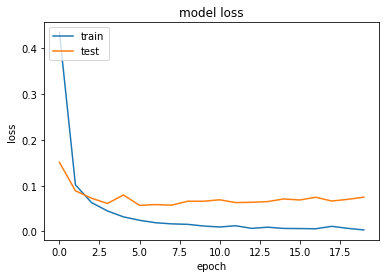

In [55]:
model_loss_plot(history)

In [56]:
def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

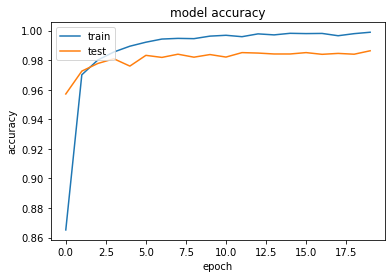

In [57]:
model_accuracy_plot(history)

In [68]:
def model_evaluate(model,X_train,y_train,X_test,y_test):
    train_loss ,train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [69]:
model_evaluate(model,X_train,Y_train,X_test,Y_test)

Train: 0.999, Test: 0.983


In [74]:
yhat = model.predict_classes(X_test_data)

C:\Users\VinitaMishra\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [76]:
predict = pd.DataFrame(data=yhat ,columns=["label"])

In [78]:
predict.shape

(21000, 1)

In [79]:
sub = test['filename']
DT = pd.merge(sub , predict, on=None, left_index= True,
    right_index=True)

In [80]:
DT.to_csv('submittion.csv',index = False)